In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyhtml import display
from pybook import reload
import pygraph
import pydec
import pyml
import pygraph
#plt.style.use('seaborn-whitegrid')

In [36]:
reload(pygraph)

### `Fields`
* **`Pregnancies`** - `Numeric` - Number of times pregnant
* **`Glucose`** - `Numeric` - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **`BloodPressure`** - `Numeric` - Diastolic blood pressure (mm Hg)
* **`SkinThickness`** - `Numeric` - Triceps skin fold thickness (mm)
* **`Insulin`** - `Numeric` - 2-Hour serum insulin (mu U/ml)
* **`BMI`** - `Numeric` - Body mass index (weight in kg/(height in m)^2)
* **`DiabetesPedigreeFunction`** - `Numeric` - Diabetes pedigree function
* **`Age`** - `Numeric` - Age (years)
* **`Outcome`** - `Numeric` - Class variable (0 or 1)



In [2]:
diabetes = pd.read_csv("datafiles/diabetes.csv").rename(columns={'DiabetesPedigreeFunction':'DPF','BloodPressure':'BP','SkinThickness':'SkinThck'})
display(diabetes,'diabetes data')

,Pregnancies,Glucose,BP,SkinThck,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1
767,1,93,70,31,0,30.400,0.315,23,0


In [3]:
display({'Describe':diabetes.describe(),'Null':diabetes.isnull().sum()})

In [14]:
features,labels = diabetes.drop(['Outcome'],axis=1),diabetes['Outcome']
display({'features':features,'labels':labels})

,Pregnancies,Glucose,BP,SkinThck,Insulin,BMI,DPF,Age
0,6,148,72,35,0,33.600,0.627,50
1,1,85,66,29,0,26.600,0.351,31
2,8,183,64,0,0,23.300,0.672,32
3,1,89,66,23,94,28.100,0.167,21
4,0,137,40,35,168,43.100,2.288,33
763,10,101,76,48,180,32.900,0.171,63
764,2,122,70,27,0,36.800,0.340,27
765,5,121,72,23,112,26.200,0.245,30
766,1,126,60,0,0,30.100,0.349,47
767,1,93,70,31,0,30.400,0.315,23


# `Visualize Label Value Distribution`

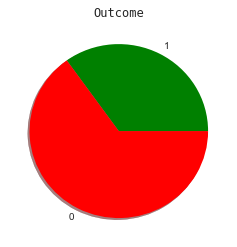

In [32]:
pygraph.piechart(labels,shadow=True,colors=['g','r'],show=True)

# `Visualize Feature Distributions`

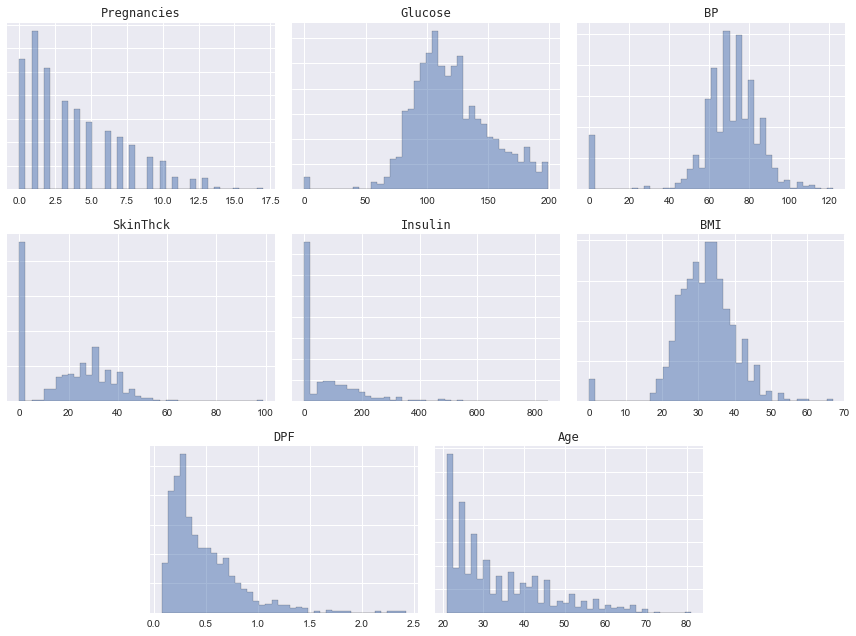

In [17]:
#features.hist(bins=50,figsize=(16,12),color='b',edgecolor='black',histtype='bar')
#plt.tight_layout()
#plt.show()

#pygraph.histogram(diabetes['BMI'],size=(5,3),show=True,bins=40)
pygraph.histogram(features,size=(4,3),show=True,bins=40,alpha=0.5,edgecolor='black')

In [7]:
def zero_features(feature):
    return feature[feature==0]

display(dict((x,zero_features(diabetes[x])) for x in ['BP','Glucose','SkinThck','BMI','Insulin']))

,BP
7,0
15,0
49,0
60,0
78,0
619,0
643,0
697,0
703,0
706,0


# `Explore Feature Correlations`

In [18]:
corr_matrix = diabetes.corr()
display(corr_matrix)

,Pregnancies,Glucose,BP,SkinThck,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BP,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThck,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DPF,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000
object,float,float,float,float,float,float,float,float,float


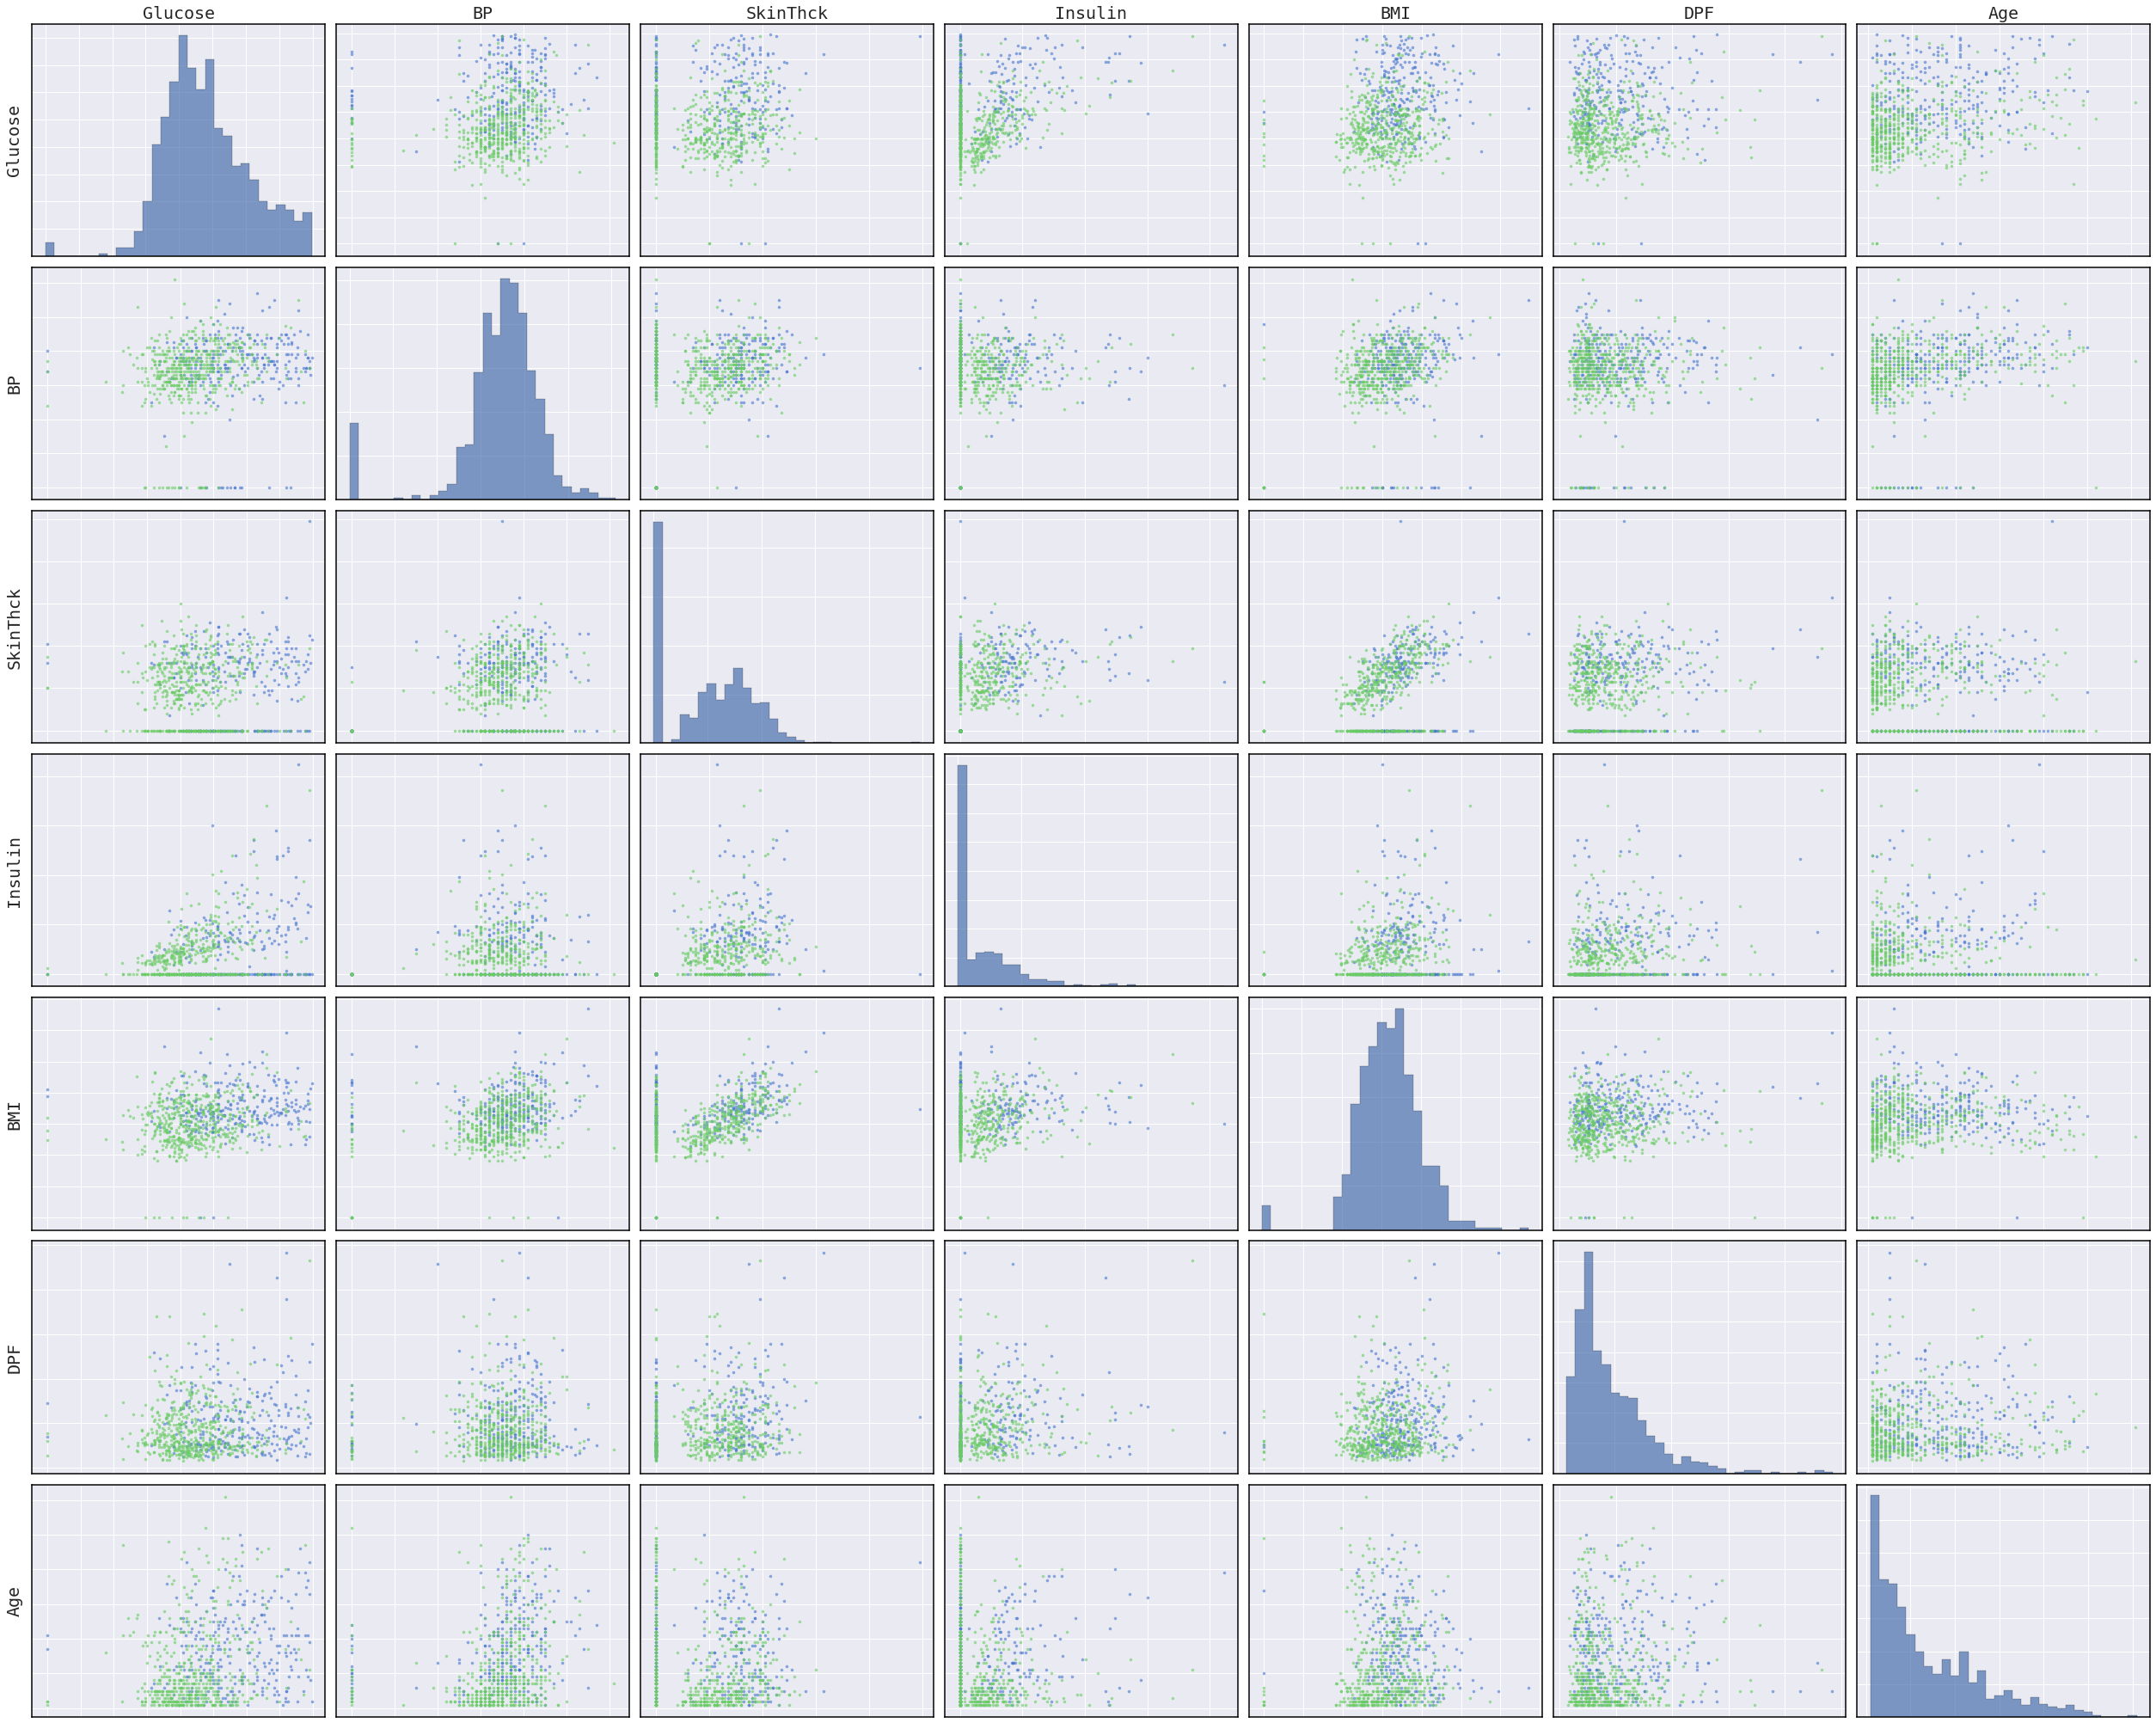

In [41]:
#pygraph.scatterplot_matrix(features.drop('Pregnancies',axis=1),show=True)
pygraph.scatterplot_matrix(diabetes.drop('Pregnancies',axis=1),facet_hue='Outcome',show=True)

# `Preparing Data Set`

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Imputer

Y_pipeline = Pipeline([
    ('selector', pyml.DataFrameSelector('Outcome'))
])

#feature_names = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
feature_names = ['Glucose','BMI','DPF','BP','Insulin','Age','SkinThck','Pregnancies']

X_pipeline = Pipeline([
    ('selector', pyml.DataFrameSelector(feature_names)),
    #('imputer', Imputer(strategy="median")),
    ('scaler', StandardScaler())
])
X,Y = X_pipeline.fit_transform(diabetes),Y_pipeline.fit_transform(diabetes)
display(X,'X')
display(Y,'Y')

0,0.8483237946271883,0.20401277134626103,0.4684919773786535,0.149640752628208,-0.6928905722954675,1.4259954044228447,0.9072699252723613,0.6399472601593604
1,-1.1233963609784168,-0.6844219461567741,-0.36506077757159927,-0.16054574674686284,-0.6928905722954675,-0.19067190513648613,0.5309015587207732,-0.8448850534430228
2,1.9437238810747468,-1.1032554558367764,0.6043973178596731,-0.2639412465385531,-0.6928905722954675,-0.1055841520017845,-1.2882122129452358,1.2338801856003137
3,-0.9982077796701243,-0.49404307812040943,-0.9207626142051013,-0.16054574674686284,0.12330164444496892,-1.0415494364835023,0.15453319216918512,-0.8448850534430228
4,0.5040551960293843,1.4097456022432373,5.484909100466951,-1.5046872440388366,0.7658359427299933,-0.020496398867082873,0.9072699252723613,-1.1418515161634994
763,-0.6226420357452472,0.11516929959595715,-0.9086821394956773,0.35643175221158857,0.8700306938032405,2.532136195173966,1.722734719467469,1.8278131110412668
764,0.034598016123287834,0.6101543564905051,-0.39828208302251517,0.046245252836517724,-0.6928905722954675,-0.5310229176752926,0.4054454365369105,-0.5479185907225461
765,0.0033008707962147404,-0.7351896442998049,-0.6851933573713341,0.149640752628208,0.27959377105483973,-0.27575965827118776,0.15453319216918512,0.34298079743888377
766,0.15978659743158022,-0.24020458740525652,-0.37110101492631137,-0.47073224612193365,-0.6928905722954675,1.1707321450187398,-1.2882122129452358,-0.8448850534430228
767,-0.873019198361832,-0.20212881379798395,-0.4737850499564149,0.046245252836517724,-0.6928905722954675,-0.8713739302140991,0.6563576809046359,-0.8448850534430228


1,0,1,0,1,,0,0,0,1,0


# `Model Selection`

* `DecisionTreeClassifier (sklearn.tree)`
* `KNeighborsClassifier (sklearn.neighbors)`

### `Links`
- [`Decision Tree`](https://www.garysieling.com/blog/sklearn-gini-vs-entropy-criteria)
- [`k-nearest-neighbors`](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)



In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,NuSVC,LinearSVC
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

MODEL = [('kNN', KNeighborsClassifier,{}),
          ('SVC', SVC,{'kernel':'rbf','decision_function_shape':'ovo'}),
          ('NuSVC', NuSVC,{'kernel':'rbf','decision_function_shape':'ovo'}),
          ('LinearSVC', LinearSVC,{}),
          ('Logistic Regression', LogisticRegression,{}),
          ('Decision Tree', DecisionTreeClassifier,{}),
          ('GaussianNB', GaussianNB,{}),
          ('Random Forest', RandomForestClassifier,{}),
          ('Gradient Boosting', GradientBoostingClassifier,{})]


## `Test Models with Cross Validation`

In [24]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
from sklearn.metrics import accuracy_score
kfold = KFold(n_splits=10, random_state=10)
strat_kfold = StratifiedKFold(n_splits=10, random_state=11)

@pydec.pd_series('Model','Accuracy')
def run_tests(models,X,Y):
    for key,cls,args in models:
        score = cross_val_score(cls(**args),X,Y,cv=strat_kfold,scoring='accuracy').mean()
        yield key,score


In [30]:
display(run_tests(MODEL,X,Y),'Various Model Accuracy Scores')


Model,Accuracy
kNN,0.738
SVC,0.762
NuSVC,0.759
LinearSVC,0.773
Logistic Regression,0.771
Decision Tree,0.711
GaussianNB,0.756
Random Forest,0.746
Gradient Boosting,0.762
object,float
